In [1]:
import numpy as np

# Convolución y correlación
* Imágenes tomadas de la wikipedia

## Convolución


En una dimensión, la convolución está dada por las siguientes ecuaciones:

Convolución:
\begin{align}
 (f * g)(t) &= \int^{\infty}_{-\infty} f(\eta) g(t - \eta) d\eta
\end{align}
donde $-\eta$ provoca un despazamiento hacia la izquierda e inversión de la función $g$ con respecto a $f$.

Convolución discreta:
\begin{align}
 f[m] * g[m] &= \sum_n f[n] g[m - n]
\end{align}

La convolución es conmutativa
\begin{align}
 f * g = g * f
\end{align}

![Convolución](figuras/Convolucion_Funcion_Pi.gif "Convolución")

In [2]:
# Convolución discreta
print("Convolución")
a = np.array([1, 2, 3])
b = np.array([0, 1, 0.5])
print(np.convolve(a, b))

print("\nPasos")
# [1,2,3] [0,1,0.5]
b_rev = b[::-1]
print("m = -2\t", np.sum(a * np.hstack((b_rev[2::], np.zeros(2)))))
print("m = -1\t", np.sum(a * np.hstack((b_rev[1::], np.zeros(1)))))
print("m = 0\t", np.sum(a * b_rev))

# Haciedo el ciclo... falta cuando hay que agregar ceros a 'a'.
print("\nEn un ciclo")
for i in range(-2,2):
    if i <= 0:
        otro = np.hstack((b_rev[-i::], np.zeros(-i)))
    else:
        otro = np.hstack((np.zeros(i), b_rev[:i+1:]))
    print("m = ", i, "\t", np.sum(a * otro))

Convolución
[0.  1.  2.5 4.  1.5]

Pasos
m = -2	 0.0
m = -1	 1.0
m = 0	 2.5

En un ciclo
m =  -2 	 0.0
m =  -1 	 1.0
m =  0 	 2.5
m =  1 	 4.0


## Correlación
Correlación cruzada
\begin{align}
 (f \star g)(t) &= \int^{\infty}_{-\infty} f^*(\eta) g(t + \eta) d\eta
\end{align}

Correlación cruzada discreta:
\begin{align}
 (f \star g)[m] &= \sum_n f^*[n] g[m + n]
\end{align}

Propiedades:
\begin{align}
 (f \star g)(t) &= (g^* \star f^*)(-t) \\
 (f \star g)(t) &= f^*(-t) * g(t)
\end{align}

![ConvoluciónYCorrelación](figuras/Comparison_convolution_correlation.svg "Convolución y correlación")

¿Por qué se usa la convolución? Hay un artículo interesante en [Quora](https://www.quora.com/How-did-visual-cortex-inspire-the-usage-of-convolution-operation-in-computer-vision). Pero las características relevantes son que es invariante a la posición que ocupa una característica en la imagen y no es tan sensible a pequeñas distorciones.

# El problema del borde

Si la función no está definida de $-\infty$ a $\infty$ se puede completar de varias formas

 * Rellenado con zeros (u otro valor) `fill`.
 * Extensión circular `wrap`.
 * Extensión por simetría `symm`.
 * Extrapolación.

# Convolución en 2D

\begin{align}
 x(n_1, n_2) * h(n_1, n_2) = \sum_{k_1=-\infty}^{\infty}  \sum_{k_2=-\infty}^{\infty} x(k_1, k_2) h(n_1 - k_1, n_2 - k_2)
\end{align}

![Convolución2D](figuras/conv2d.png "Convolución 2D")

## Núcleos (*kernels*) famosos

### Desenfoque o suavizado

\begin{align}
 k_s &= \frac{1}{9}\begin{pmatrix}
        1 & 1 & 1 \\
        1 & 1 & 1 \\
        1 & 1 & 1
       \end{pmatrix}
\end{align}

### Derivadas
\begin{align}
D_xI &=\frac{1}{2}
       \begin{pmatrix}
        0 & 0 & 0 \\
        -1 & 0 & 1 \\
        0 & 0 & 0
       \end{pmatrix} &
D_yI &= \frac{1}{2}
       \begin{pmatrix}
        0 & -1 & 0 \\
        0 & 0 & 0 \\
        0 & 1 & 0
       \end{pmatrix}
\end{align}

In [3]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html
# Aplicamos un kernel sobre una imagen tomada del set de datos de scipy

from scipy import signal
from scipy import misc
ascent = misc.ascent()
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
                   [-10+0j, 0+ 0j, +10 +0j],
                   [ -3+3j, 0+10j,  +3 +3j]]) # Gx + j*Gy
grad = signal.convolve2d(ascent, scharr, boundary='symm', mode='same')

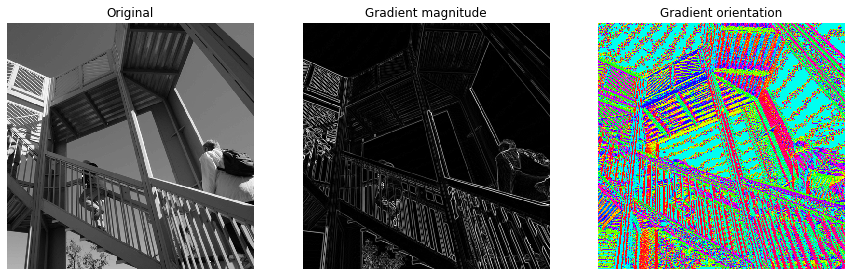

In [5]:
import matplotlib.pyplot as plt
fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(1, 3, figsize=(15, 15))
ax_orig.imshow(ascent, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()
ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('Gradient orientation')
ax_ang.set_axis_off()